In [1]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import softmax
from torch.nn import functional as F

In [2]:
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

input_text = "pdero jose antonio maria"

inputs = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True)
outputs = model(**inputs, output_attentions=True)

attention_weights = outputs.attentions[-1][0].cpu().detach().numpy()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [3]:
attention_weights.shape

(12, 7, 7)

In [4]:
attention_weights[0]

array([[1.13867775e-01, 6.39326274e-02, 1.58343792e-01, 1.37384981e-01,
        4.89154905e-02, 1.21219791e-01, 3.56335491e-01],
       [2.24713832e-02, 8.79967678e-03, 3.50738014e-03, 5.92632638e-03,
        3.34378262e-03, 5.35750901e-03, 9.50594008e-01],
       [1.29392426e-02, 5.93099277e-03, 1.87392335e-03, 3.12806596e-03,
        1.74561038e-03, 2.05183192e-03, 9.72330332e-01],
       [9.48738027e-03, 3.58055113e-03, 1.33521936e-03, 1.95642421e-03,
        1.49750477e-03, 2.06313888e-03, 9.80079830e-01],
       [7.90913217e-03, 2.62822723e-03, 6.97173120e-04, 1.49185688e-03,
        1.10913732e-03, 1.79232692e-03, 9.84372199e-01],
       [1.73305385e-02, 3.65625694e-03, 1.42092176e-03, 3.62690445e-03,
        2.03392026e-03, 3.79903149e-03, 9.68132436e-01],
       [1.26919094e-02, 9.96876042e-03, 2.61902367e-03, 8.57111812e-03,
        5.07408986e-03, 4.15888848e-03, 9.56916213e-01]], dtype=float32)

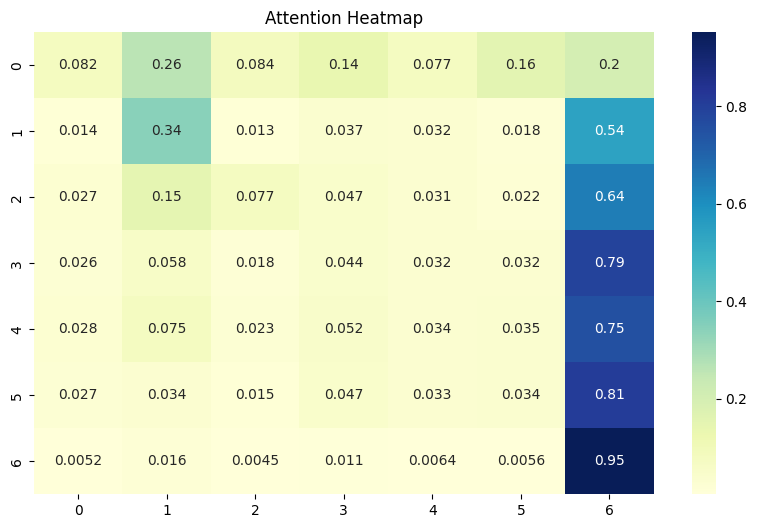

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(attention_weights[7], annot=True, cmap="YlGnBu")
plt.title("Attention Heatmap")
plt.show()

In [37]:
x, y, z = attention_weights.shape
mis_datos = torch.zeros(y,z)
for i, attention_weight in enumerate(attention_weights):
    mis_datos += attention_weight

mis_datos = mis_datos/ i
for i, row in enumerate(mis_datos):
    mis_datos[i] = F.softmax(row)

mis_datos

/tmp/ipykernel_5150/1839868750.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  mis_datos[i] = F.softmax(row)


tensor([[0.1400, 0.1422, 0.1418, 0.1408, 0.1418, 0.1549, 0.1384],
        [0.1228, 0.1468, 0.1198, 0.1195, 0.1190, 0.1188, 0.2532],
        [0.1313, 0.1236, 0.1461, 0.1223, 0.1216, 0.1213, 0.2339],
        [0.1269, 0.1201, 0.1219, 0.1272, 0.1234, 0.1215, 0.2589],
        [0.1281, 0.1221, 0.1230, 0.1273, 0.1282, 0.1239, 0.2473],
        [0.1376, 0.1231, 0.1229, 0.1260, 0.1271, 0.1316, 0.2317],
        [0.1148, 0.1138, 0.1133, 0.1135, 0.1132, 0.1134, 0.3179]])

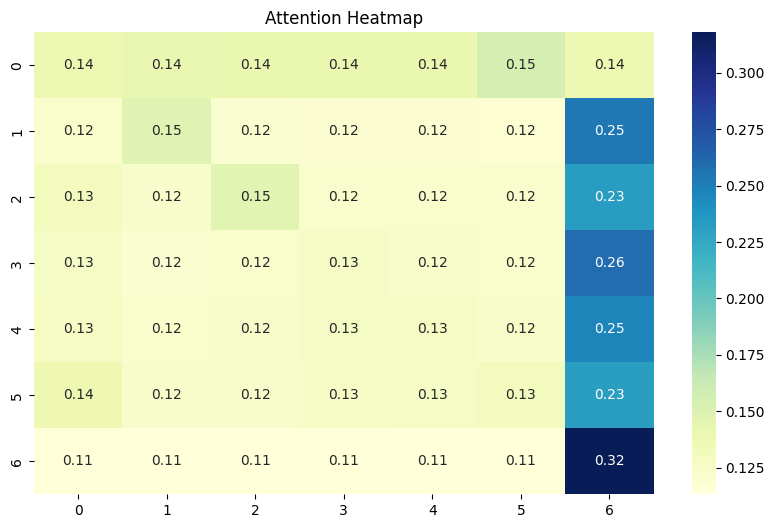

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(mis_datos, annot=True, cmap="YlGnBu")
plt.title("Attention Heatmap")
plt.show()